In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Interocular Response Statistics from Fig 5a,b

In [4]:
nori = 20

In [5]:
sim_vsm_base_means = np.zeros((6))
sim_vsm_base_stds = np.zeros((6))
sim_vsm_opto_means = np.zeros((6))
sim_vsm_opto_stds = np.zeros((6))
sim_vsm_diff_means = np.zeros((6))
sim_vsm_diff_stds = np.zeros((6))
sim_vsm_norm_covs = np.zeros((6))
sim_vsm_base_bals = np.zeros((6))
sim_vsm_opto_bals = np.zeros((6))
sim_μrEs = np.zeros((6,3,nori))
sim_μrIs = np.zeros((6,3,nori))
sim_ΣrEs = np.zeros((6,4,nori))
sim_ΣrIs = np.zeros((6,4,nori))
sim_μhEs = np.zeros((6,3,nori))
sim_μhIs = np.zeros((6,3,nori))
sim_ΣhEs = np.zeros((6,4,nori))
sim_ΣhIs = np.zeros((6,4,nori))
sim_balEs = np.zeros((6,2,nori))
sim_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/best_fit_1s_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)

    sim_vsm_base_means[c_idx] = res_dict["vsm_base_means"]
    sim_vsm_base_stds[c_idx] = res_dict["vsm_base_stds"]
    sim_vsm_opto_means[c_idx] = res_dict["vsm_opto_means"]
    sim_vsm_opto_stds[c_idx] = res_dict["vsm_opto_stds"]
    sim_vsm_diff_means[c_idx] = res_dict["vsm_diff_means"]
    sim_vsm_diff_stds[c_idx] = res_dict["vsm_diff_stds"]
    sim_vsm_norm_covs[c_idx] = res_dict["vsm_norm_covs"]
    sim_vsm_base_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[0,0]+0.2*np.mean(res_dict["balIs"],0)[0,0]
    sim_vsm_opto_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[1,0]+0.2*np.mean(res_dict["balIs"],0)[1,0]
    sim_μrEs[c_idx] = np.mean(res_dict["μrEs"],0)
    sim_μrIs[c_idx] = np.mean(res_dict["μrIs"],0)
    sim_ΣrEs[c_idx] = np.mean(res_dict["ΣrEs"],0)
    sim_ΣrIs[c_idx] = np.mean(res_dict["ΣrIs"],0)
    sim_μhEs[c_idx] = np.mean(res_dict["μhEs"],0)
    sim_μhIs[c_idx] = np.mean(res_dict["μhIs"],0)
    sim_ΣhEs[c_idx] = np.mean(res_dict["ΣhEs"],0)
    sim_ΣhIs[c_idx] = np.mean(res_dict["ΣhIs"],0)
    sim_balEs[c_idx] = np.mean(res_dict["balEs"],0)
    sim_balIs[c_idx] = np.mean(res_dict["balIs"],0)
        
sim_preds = np.concatenate((
    sim_vsm_base_means[:,None],
    sim_vsm_opto_means[:,None],
    sim_vsm_base_stds[:,None],
    sim_vsm_opto_stds[:,None],
    sim_vsm_diff_stds[:,None],
    sim_vsm_norm_covs[:,None],
    sim_vsm_diff_means[:,None],
),1)
        
sim_Epreds = np.concatenate((
    sim_μrEs[:,0:1,:],
    sim_μrEs[:,1:2,:],
    np.sqrt(sim_ΣrEs[:,0:1,:]),
    np.sqrt(sim_ΣrEs[:,1:2,:]),
    np.sqrt(sim_ΣrEs[:,2:3,:]),
    sim_ΣrEs[:,3:4,:]/sim_ΣrEs[:,2:3,:],
    sim_μrEs[:,2:3,:]
),1)

sim_Ipreds = np.concatenate((
    sim_μrIs[:,0:1,:],
    sim_μrIs[:,1:2,:],
    np.sqrt(sim_ΣrIs[:,0:1,:]),
    np.sqrt(sim_ΣrIs[:,1:2,:]),
    np.sqrt(sim_ΣrIs[:,2:3,:]),
    sim_ΣrIs[:,3:4,:]/sim_ΣrIs[:,2:3,:],
    sim_μrIs[:,2:3,:]
),1)

In [6]:
dmft_vsm_base_means = np.zeros((6))
dmft_vsm_base_stds = np.zeros((6))
dmft_vsm_opto_means = np.zeros((6))
dmft_vsm_opto_stds = np.zeros((6))
dmft_vsm_diff_means = np.zeros((6))
dmft_vsm_diff_stds = np.zeros((6))
dmft_vsm_norm_covs = np.zeros((6))
dmft_vsm_base_bals = np.zeros((6))
dmft_vsm_opto_bals = np.zeros((6))
dmft_μrEs = np.zeros((6,3,nori))
dmft_μrIs = np.zeros((6,3,nori))
dmft_ΣrEs = np.zeros((6,4,nori))
dmft_ΣrIs = np.zeros((6,4,nori))
dmft_balEs = np.zeros((6,2,nori))
dmft_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/dmft_best_fit_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)

    dmft_vsm_base_means[c_idx] = res_dict["vsm_base_means"]
    dmft_vsm_base_stds[c_idx] = res_dict["vsm_base_stds"]
    dmft_vsm_opto_means[c_idx] = res_dict["vsm_opto_means"]
    dmft_vsm_opto_stds[c_idx] = res_dict["vsm_opto_stds"]
    dmft_vsm_diff_means[c_idx] = res_dict["vsm_diff_means"]
    dmft_vsm_diff_stds[c_idx] = res_dict["vsm_diff_stds"]
    dmft_vsm_norm_covs[c_idx] = res_dict["vsm_norm_covs"]
    dmft_vsm_base_bals[c_idx] = 0.8*res_dict["balEs"][0,0]+0.2*res_dict["balIs"][0,0]
    dmft_vsm_opto_bals[c_idx] = 0.8*res_dict["balEs"][1,0]+0.2*res_dict["balIs"][1,0]
    dmft_μrEs[c_idx] = res_dict["μrEs"]
    dmft_μrIs[c_idx] = res_dict["μrIs"]
    dmft_ΣrEs[c_idx] = res_dict["ΣrEs"]
    dmft_ΣrIs[c_idx] = res_dict["ΣrIs"]
    dmft_balEs[c_idx] = res_dict["balEs"]
    dmft_balIs[c_idx] = res_dict["balIs"]
        
dmft_preds = np.concatenate((
    dmft_vsm_base_means[:,None],
    dmft_vsm_opto_means[:,None],
    dmft_vsm_base_stds[:,None],
    dmft_vsm_opto_stds[:,None],
    dmft_vsm_diff_stds[:,None],
    dmft_vsm_norm_covs[:,None],
    dmft_vsm_diff_means[:,None],
),1)
        
dmft_Epreds = np.concatenate((
    dmft_μrEs[:,0:1,:],
    dmft_μrEs[:,1:2,:],
    np.sqrt(dmft_ΣrEs[:,0:1,:]),
    np.sqrt(dmft_ΣrEs[:,1:2,:]),
    np.sqrt(dmft_ΣrEs[:,2:3,:]),
    dmft_ΣrEs[:,3:4,:]/dmft_ΣrEs[:,2:3,:],
    dmft_μrEs[:,2:3,:]
),1)

dmft_Ipreds = np.concatenate((
    dmft_μrIs[:,0:1,:],
    dmft_μrIs[:,1:2,:],
    np.sqrt(dmft_ΣrIs[:,0:1,:]),
    np.sqrt(dmft_ΣrIs[:,1:2,:]),
    np.sqrt(dmft_ΣrIs[:,2:3,:]),
    dmft_ΣrIs[:,3:4,:]/dmft_ΣrIs[:,2:3,:],
    dmft_μrIs[:,2:3,:]
),1)

In [7]:
sim_norm_vsm_base_means = np.zeros((6))
sim_norm_vsm_base_stds = np.zeros((6))
sim_norm_vsm_opto_means = np.zeros((6))
sim_norm_vsm_opto_stds = np.zeros((6))
sim_norm_vsm_diff_means = np.zeros((6))
sim_norm_vsm_diff_stds = np.zeros((6))
sim_norm_vsm_norm_covs = np.zeros((6))
sim_norm_vsm_base_bals = np.zeros((6))
sim_norm_vsm_opto_bals = np.zeros((6))
sim_norm_μrEs = np.zeros((6,3,nori))
sim_norm_μrIs = np.zeros((6,3,nori))
sim_norm_ΣrEs = np.zeros((6,4,nori))
sim_norm_ΣrIs = np.zeros((6,4,nori))
sim_norm_μhEs = np.zeros((6,3,nori))
sim_norm_μhIs = np.zeros((6,3,nori))
sim_norm_ΣhEs = np.zeros((6,4,nori))
sim_norm_ΣhIs = np.zeros((6,4,nori))
sim_norm_balEs = np.zeros((6,2,nori))
sim_norm_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/opto_norm_c1_{:d}_c2_{:d}".format(c_idx,c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)

    sim_norm_vsm_base_means[c_idx] = res_dict["vsm1_base_means"]
    sim_norm_vsm_base_stds[c_idx] = res_dict["vsm1_base_stds"]
    sim_norm_vsm_opto_means[c_idx] = res_dict["vsm1_opto_means"]
    sim_norm_vsm_opto_stds[c_idx] = res_dict["vsm1_opto_stds"]
    sim_norm_vsm_diff_means[c_idx] = res_dict["vsm1_diff_means"]
    sim_norm_vsm_diff_stds[c_idx] = res_dict["vsm1_diff_stds"]
    sim_norm_vsm_norm_covs[c_idx] = res_dict["vsm1_norm_covs"]
    sim_norm_vsm_base_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[0,0]+0.2*np.mean(res_dict["balIs"],0)[0,0]
    sim_norm_vsm_opto_bals[c_idx] = 0.8*np.mean(res_dict["balEs"],0)[1,0]+0.2*np.mean(res_dict["balIs"],0)[1,0]
    sim_norm_μrEs[c_idx] = np.mean(res_dict["μrEs"],0)
    sim_norm_μrIs[c_idx] = np.mean(res_dict["μrIs"],0)
    sim_norm_ΣrEs[c_idx] = np.mean(res_dict["ΣrEs"],0)
    sim_norm_ΣrIs[c_idx] = np.mean(res_dict["ΣrIs"],0)
    sim_norm_μhEs[c_idx] = np.mean(res_dict["μhEs"],0)
    sim_norm_μhIs[c_idx] = np.mean(res_dict["μhIs"],0)
    sim_norm_ΣhEs[c_idx] = np.mean(res_dict["ΣhEs"],0)
    sim_norm_ΣhIs[c_idx] = np.mean(res_dict["ΣhIs"],0)
    sim_norm_balEs[c_idx] = np.mean(res_dict["balEs"],0)
    sim_norm_balIs[c_idx] = np.mean(res_dict["balIs"],0)
        
sim_norm_preds = np.concatenate((
    sim_norm_vsm_base_means[:,None],
    sim_norm_vsm_opto_means[:,None],
    sim_norm_vsm_base_stds[:,None],
    sim_norm_vsm_opto_stds[:,None],
    sim_norm_vsm_diff_stds[:,None],
    sim_norm_vsm_norm_covs[:,None],
    sim_norm_vsm_diff_means[:,None],
),1)
        
sim_norm_Epreds = np.concatenate((
    sim_norm_μrEs[:,0:1,:],
    sim_norm_μrEs[:,1:2,:],
    np.sqrt(sim_norm_ΣrEs[:,0:1,:]),
    np.sqrt(sim_norm_ΣrEs[:,1:2,:]),
    np.sqrt(sim_norm_ΣrEs[:,2:3,:]),
    sim_norm_ΣrEs[:,3:4,:]/sim_norm_ΣrEs[:,2:3,:],
    sim_norm_μrEs[:,2:3,:]
),1)

sim_norm_Ipreds = np.concatenate((
    sim_norm_μrIs[:,0:1,:],
    sim_norm_μrIs[:,1:2,:],
    np.sqrt(sim_norm_ΣrIs[:,0:1,:]),
    np.sqrt(sim_norm_ΣrIs[:,1:2,:]),
    np.sqrt(sim_norm_ΣrIs[:,2:3,:]),
    sim_norm_ΣrIs[:,3:4,:]/sim_norm_ΣrIs[:,2:3,:],
    sim_norm_μrIs[:,2:3,:]
),1)

In [8]:
dmft_norm_vsm_base_means = np.zeros((6))
dmft_norm_vsm_base_stds = np.zeros((6))
dmft_norm_vsm_opto_means = np.zeros((6))
dmft_norm_vsm_opto_stds = np.zeros((6))
dmft_norm_vsm_diff_means = np.zeros((6))
dmft_norm_vsm_diff_stds = np.zeros((6))
dmft_norm_vsm_norm_covs = np.zeros((6))
dmft_norm_vsm_base_bals = np.zeros((6))
dmft_norm_vsm_opto_bals = np.zeros((6))
dmft_norm_μrEs = np.zeros((6,3,nori))
dmft_norm_μrIs = np.zeros((6,3,nori))
dmft_norm_ΣrEs = np.zeros((6,4,nori))
dmft_norm_ΣrIs = np.zeros((6,4,nori))
dmft_norm_balEs = np.zeros((6,2,nori))
dmft_norm_balIs = np.zeros((6,2,nori))

for c_idx in range(6):
    with open("./../../model_data/dmft_opto_norm_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)

    dmft_norm_vsm_base_means[c_idx] = res_dict["vsm_base_means"]
    dmft_norm_vsm_base_stds[c_idx] = res_dict["vsm_base_stds"]
    dmft_norm_vsm_opto_means[c_idx] = res_dict["vsm_opto_means"]
    dmft_norm_vsm_opto_stds[c_idx] = res_dict["vsm_opto_stds"]
    dmft_norm_vsm_diff_means[c_idx] = res_dict["vsm_diff_means"]
    dmft_norm_vsm_diff_stds[c_idx] = res_dict["vsm_diff_stds"]
    dmft_norm_vsm_norm_covs[c_idx] = res_dict["vsm_norm_covs"]
    dmft_norm_vsm_base_bals[c_idx] = 0.8*res_dict["balEs"][0,0]+0.2*res_dict["balIs"][0,0]
    dmft_norm_vsm_opto_bals[c_idx] = 0.8*res_dict["balEs"][1,0]+0.2*res_dict["balIs"][1,0]
    dmft_norm_μrEs[c_idx] = res_dict["μrEs"]
    dmft_norm_μrIs[c_idx] = res_dict["μrIs"]
    dmft_norm_ΣrEs[c_idx] = res_dict["ΣrEs"]
    dmft_norm_ΣrIs[c_idx] = res_dict["ΣrIs"]
    dmft_norm_balEs[c_idx] = res_dict["balEs"]
    dmft_norm_balIs[c_idx] = res_dict["balIs"]
        
dmft_norm_preds = np.concatenate((
    dmft_norm_vsm_base_means[:,None],
    dmft_norm_vsm_opto_means[:,None],
    dmft_norm_vsm_base_stds[:,None],
    dmft_norm_vsm_opto_stds[:,None],
    dmft_norm_vsm_diff_stds[:,None],
    dmft_norm_vsm_norm_covs[:,None],
    dmft_norm_vsm_diff_means[:,None],
),1)
        
dmft_norm_Epreds = np.concatenate((
    dmft_norm_μrEs[:,0:1,:],
    dmft_norm_μrEs[:,1:2,:],
    np.sqrt(dmft_norm_ΣrEs[:,0:1,:]),
    np.sqrt(dmft_norm_ΣrEs[:,1:2,:]),
    np.sqrt(dmft_norm_ΣrEs[:,2:3,:]),
    dmft_norm_ΣrEs[:,3:4,:]/dmft_norm_ΣrEs[:,2:3,:],
    dmft_norm_μrEs[:,2:3,:]
),1)

dmft_norm_Ipreds = np.concatenate((
    dmft_norm_μrIs[:,0:1,:],
    dmft_norm_μrIs[:,1:2,:],
    np.sqrt(dmft_norm_ΣrIs[:,0:1,:]),
    np.sqrt(dmft_norm_ΣrIs[:,1:2,:]),
    np.sqrt(dmft_norm_ΣrIs[:,2:3,:]),
    dmft_norm_ΣrIs[:,3:4,:]/dmft_norm_ΣrIs[:,2:3,:],
    dmft_norm_μrIs[:,2:3,:]
),1)

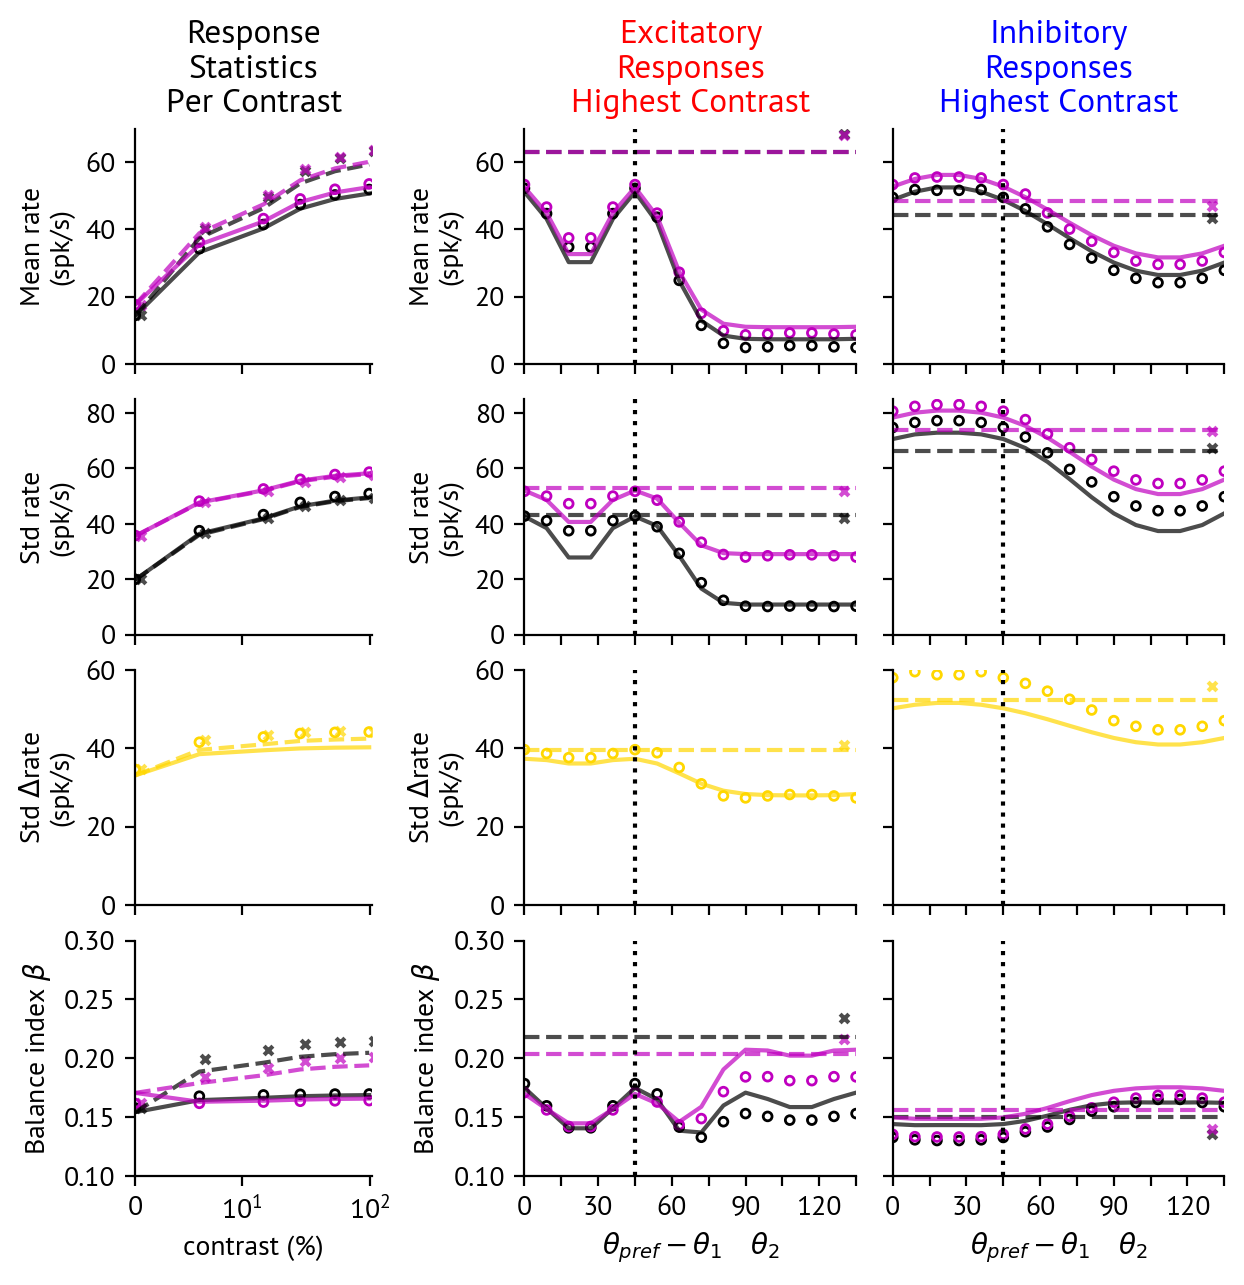

In [ ]:
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]
shift_cons = cons.copy()
shift_cons[shift_cons <  12] += 0.5
shift_cons[shift_cons >= 12] *= 1.1

oris = np.arange(nori*3//4+1) * 90/(nori/2)
def abs_ori(A):
    return 0.5*(A[:nori*3//4+1]+np.roll(A[-1::-1],nori//4+1,0)[:nori*3//4+1])
sing_oris = [130]
def sing_abs_ori(A):
    return A[0:1]
sing_dmft_oris = [0,135]
def sing_dmft_abs_ori(A):
    return [A[0],A[0]]

cidx = 5

fig,axs = plt.subplots(4,4,figsize=(1.7*4.133,1.7*4),dpi=200,sharex="col",sharey="row",
                       width_ratios=(3,1,4.2,4.2))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
for i in range(4):
    axs[i,1].set_axis_off()
    axs[i,2].yaxis.set_tick_params(which="both",labelleft=True)
axs = axs[:,[0,2,3]]

axs[0,0].plot([-1],[-1],label=r"Data $\pm$ SEM")
axs[0,0].plot([-1],[-1],label="Simulation")
axs[0,0].plot([-1],[-1],label="Theory")
axs[0,0].plot(cons,dmft_norm_preds[:,0],c="k",ls="-",label="Vis Stim Only",alpha=0.7)
axs[0,0].plot(cons,dmft_preds[:,0],c="k",ls="--",label="Vis Stim Only",alpha=0.7)
axs[0,0].scatter(cons,sim_norm_preds[:,0],edgecolors="k",facecolors="none",marker="o",s=10,label="Vis Stim Only")
axs[0,0].scatter(shift_cons,sim_preds[:,0],facecolors="k",marker="x",s=10,alpha=0.7,label="Vis Stim Only")
axs[0,0].plot(cons,dmft_norm_preds[:,1],c="m",ls="-",alpha=0.7)
axs[0,0].plot(cons,dmft_preds[:,1],c="m",ls="--",alpha=0.7)
axs[0,0].scatter(cons,sim_norm_preds[:,1],edgecolors="m",facecolors="none",marker="o",s=10)
axs[0,0].scatter(shift_cons,sim_preds[:,1],facecolors="m",marker="x",s=10,alpha=0.7)

axs[1,0].plot(cons,dmft_norm_preds[:,2],c="k",ls="-",alpha=0.7)
axs[1,0].plot(cons,dmft_preds[:,2],c="k",ls="--",alpha=0.7)
axs[1,0].scatter(cons,sim_norm_preds[:,2],edgecolors="k",facecolors="none",marker="o",s=10)
axs[1,0].scatter(shift_cons,sim_preds[:,2],facecolors="k",marker="x",s=10,alpha=0.7)
axs[1,0].plot(cons,dmft_norm_preds[:,3],c="m",ls="-",label="Vis+Opto Stim",alpha=0.7)
axs[1,0].plot(cons,dmft_preds[:,3],c="m",ls="--",label="Vis+Opto Stim",alpha=0.7)
axs[1,0].scatter(cons,sim_norm_preds[:,3],edgecolors="m",facecolors="none",marker="o",s=10,label="Vis+Opto Stim")
axs[1,0].scatter(shift_cons,sim_preds[:,3],facecolors="m",marker="x",s=10,alpha=0.7,label="Vis+Opto Stim")

axs[2,0].plot(cons,dmft_norm_preds[:,4],c="gold",ls="-",label=r"Opto Evoked $\Delta$Rate",alpha=0.7)
axs[2,0].plot(cons,dmft_preds[:,4],c="gold",ls="--",label=r"Opto Evoked $\Delta$Rate",alpha=0.7)
axs[2,0].scatter(cons,sim_norm_preds[:,4],edgecolors="gold",facecolors="none",marker="o",s=10,label=r"Opto Evoked $\Delta$Rate")
axs[2,0].scatter(shift_cons,sim_preds[:,4],facecolors="gold",marker="x",s=10,alpha=0.7,label=r"Opto Evoked $\Delta$Rate")

axs[3,0].plot(cons,dmft_norm_vsm_base_bals,c="k",ls="-",alpha=0.7)
axs[3,0].plot(cons,dmft_vsm_base_bals,c="k",ls="--",alpha=0.7)
axs[3,0].plot(cons,dmft_norm_vsm_opto_bals,c="m",ls="-",alpha=0.7)
axs[3,0].plot(cons,dmft_vsm_opto_bals,c="m",ls="--",alpha=0.7)
axs[3,0].scatter(cons,sim_norm_vsm_base_bals,edgecolors="k",facecolors="none",marker="o",s=10)
axs[3,0].scatter(shift_cons,sim_vsm_base_bals,facecolors="k",marker="x",s=10,alpha=0.7)
axs[3,0].scatter(cons,sim_norm_vsm_opto_bals,edgecolors="m",facecolors="none",marker="o",s=10)
axs[3,0].scatter(shift_cons,sim_vsm_opto_bals,facecolors="m",marker="x",s=10,alpha=0.7)

axs[0,1].plot(oris,abs_ori(dmft_norm_Epreds[cidx,0,:]),c="k",ls="-",alpha=0.7)
axs[0,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Epreds[cidx,0,:]),c="k",ls="--",alpha=0.7)
axs[0,1].scatter(oris,abs_ori(sim_norm_Epreds[cidx,0,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[0,1].scatter(sing_oris,sing_abs_ori(sim_Epreds[cidx,0,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[0,1].plot(oris,abs_ori(dmft_norm_Epreds[cidx,1,:]),c="m",ls="-",alpha=0.7)
axs[0,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Epreds[cidx,1,:]),c="m",ls="--",alpha=0.7)
axs[0,1].scatter(oris,abs_ori(sim_norm_Epreds[cidx,1,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[0,1].scatter(sing_oris,sing_abs_ori(sim_Epreds[cidx,1,:]),facecolors="m",marker="x",s=10,alpha=0.7)

axs[0,2].plot(oris,abs_ori(dmft_norm_Ipreds[cidx,0,:]),c="k",ls="-",alpha=0.7)
axs[0,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Ipreds[cidx,0,:]),c="k",ls="--",alpha=0.7)
axs[0,2].scatter(oris,abs_ori(sim_norm_Ipreds[cidx,0,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[0,2].scatter(sing_oris,sing_abs_ori(sim_Ipreds[cidx,0,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[0,2].plot(oris,abs_ori(dmft_norm_Ipreds[cidx,1,:]),c="m",ls="-",alpha=0.7)
axs[0,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Ipreds[cidx,1,:]),c="m",ls="--",alpha=0.7)
axs[0,2].scatter(oris,abs_ori(sim_norm_Ipreds[cidx,1,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[0,2].scatter(sing_oris,sing_abs_ori(sim_Ipreds[cidx,1,:]),facecolors="m",marker="x",s=10,alpha=0.7)

axs[1,1].plot(oris,abs_ori(dmft_norm_Epreds[cidx,2,:]),c="k",ls="-",alpha=0.7)
axs[1,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Epreds[cidx,2,:]),c="k",ls="--",alpha=0.7)
axs[1,1].scatter(oris,abs_ori(sim_norm_Epreds[cidx,2,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[1,1].scatter(sing_oris,sing_abs_ori(sim_Epreds[cidx,2,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[1,1].plot(oris,abs_ori(dmft_norm_Epreds[cidx,3,:]),c="m",ls="-",alpha=0.7)
axs[1,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Epreds[cidx,3,:]),c="m",ls="--",alpha=0.7)
axs[1,1].scatter(oris,abs_ori(sim_norm_Epreds[cidx,3,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[1,1].scatter(sing_oris,sing_abs_ori(sim_Epreds[cidx,3,:]),facecolors="m",marker="x",s=10,alpha=0.7)

axs[1,2].plot(oris,abs_ori(dmft_norm_Ipreds[cidx,2,:]),c="k",ls="-",alpha=0.7)
axs[1,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Ipreds[cidx,2,:]),c="k",ls="--",alpha=0.7)
axs[1,2].scatter(oris,abs_ori(sim_norm_Ipreds[cidx,2,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[1,2].scatter(sing_oris,sing_abs_ori(sim_Ipreds[cidx,2,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[1,2].plot(oris,abs_ori(dmft_norm_Ipreds[cidx,3,:]),c="m",ls="-",alpha=0.7)
axs[1,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Ipreds[cidx,3,:]),c="m",ls="--",alpha=0.7)
axs[1,2].scatter(oris,abs_ori(sim_norm_Ipreds[cidx,3,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[1,2].scatter(sing_oris,sing_abs_ori(sim_Ipreds[cidx,3,:]),facecolors="m",marker="x",s=10,alpha=0.7)

axs[2,1].plot(oris,abs_ori(dmft_norm_Epreds[cidx,4,:]),c="gold",ls="-",alpha=0.7)
axs[2,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Epreds[cidx,4,:]),c="gold",ls="--",alpha=0.7)
axs[2,1].scatter(oris,abs_ori(sim_norm_Epreds[cidx,4,:]),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[2,1].scatter(sing_oris,sing_abs_ori(sim_Epreds[cidx,4,:]),facecolors="gold",marker="x",s=10,alpha=0.7)

axs[2,2].plot(oris,abs_ori(dmft_norm_Ipreds[cidx,4,:]),c="gold",ls="-",alpha=0.7)
axs[2,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_Ipreds[cidx,4,:]),c="gold",ls="--",alpha=0.7)
axs[2,2].scatter(oris,abs_ori(sim_norm_Ipreds[cidx,4,:]),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[2,2].scatter(sing_oris,sing_abs_ori(sim_Ipreds[cidx,4,:]),facecolors="gold",marker="x",s=10,alpha=0.7)

axs[3,1].plot(oris,abs_ori(dmft_norm_balEs[cidx,0,:]),c="k",ls="-",alpha=0.7)
axs[3,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_balEs[cidx,0,:]),c="k",ls="--",alpha=0.7)
axs[3,1].plot(oris,abs_ori(dmft_norm_balEs[cidx,1,:]),c="m",ls="-",alpha=0.7)
axs[3,1].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_balEs[cidx,1,:]),c="m",ls="--",alpha=0.7)
axs[3,1].scatter(oris,abs_ori(sim_norm_balEs[cidx,0,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[3,1].scatter(sing_oris,sing_abs_ori(sim_balEs[cidx,0,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[3,1].scatter(oris,abs_ori(sim_norm_balEs[cidx,1,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[3,1].scatter(sing_oris,sing_abs_ori(sim_balEs[cidx,1,:]),facecolors="m",marker="x",s=10,alpha=0.7)

axs[3,2].plot(oris,abs_ori(dmft_norm_balIs[cidx,0,:]),c="k",ls="-",alpha=0.7)
axs[3,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_balIs[cidx,0,:]),c="k",ls="--",alpha=0.7)
axs[3,2].plot(oris,abs_ori(dmft_norm_balIs[cidx,1,:]),c="m",ls="-",alpha=0.7)
axs[3,2].plot(sing_dmft_oris,sing_dmft_abs_ori(dmft_balIs[cidx,1,:]),c="m",ls="--",alpha=0.7)
axs[3,2].scatter(oris,abs_ori(sim_norm_balIs[cidx,0,:]),edgecolors="k",facecolors="none",marker="o",s=10)
axs[3,2].scatter(sing_oris,sing_abs_ori(sim_balIs[cidx,0,:]),facecolors="k",marker="x",s=10,alpha=0.7)
axs[3,2].scatter(oris,abs_ori(sim_norm_balIs[cidx,1,:]),edgecolors="m",facecolors="none",marker="o",s=10)
axs[3,2].scatter(sing_oris,sing_abs_ori(sim_balIs[cidx,1,:]),facecolors="m",marker="x",s=10,alpha=0.7)

for i in range(3):
    axs[3,i].axhline(0,c="k",ls="--")

for ax in axs.flat:
    ax.spines[["right", "top"]].set_visible(False)

axs[0,0].set_xscale("symlog", linthresh=12)
nticks = 10
ticks = np.array(["{:.0f}".format(ori) for ori in np.linspace(0,135,nticks)])
ticks[1::2] = ""
for i in range(1,3):
    axs[0,i].set_xticks(np.linspace(0,135,nticks),ticks)
for i in range(4):
    axs[i,1].axvline(45,c="k",ls=":")
    axs[i,2].axvline(45,c="k",ls=":")

axs[0,0].set_xlim(0,105)
axs[0,1].set_xlim(0,135)
axs[0,2].set_xlim(0,135)
axs[0,0].set_ylim(0,70)
axs[1,0].set_ylim(0,85)
axs[2,0].set_ylim(0,60)
axs[3,0].set_ylim(0.1,0.3)

axs[0,0].set_yticks([ 0,20,40,60])
axs[1,0].set_yticks([ 0,20,40,60,80])

for i in [3]:
    axs[i,0].set_xlabel("contrast (%)")
    axs[i,1].set_xlabel(r"$\theta_{pref}-\theta_1\quad\theta_2$")
    axs[i,2].set_xlabel(r"$\theta_{pref}-\theta_1\quad\theta_2$")

for i in [0,1]:
    axs[0,i].set_ylabel("Mean rate\n(spk/s)")
    axs[1,i].set_ylabel("Std rate\n(spk/s)")
    axs[2,i].set_ylabel(r"Std $\Delta$rate"+"\n(spk/s)")
    axs[3,i].set_ylabel(r"Balance index $\beta$")

axs[0,0].set_title("Response\nStatistics\nPer Contrast",color="k")
axs[0,1].set_title("Excitatory\nResponses\nHighest Contrast",color="r")
axs[0,2].set_title("Inhibitory\nResponses\nHighest Contrast",color="b")

# fig.tight_layout()
fig.savefig("./fig_5ab.pdf")

# Plot Interocular Population Tuning Widths from Fig 5c

In [10]:
from scipy.interpolate import UnivariateSpline,make_smoothing_spline
from scipy.optimize import root

sim_srMEs = np.zeros((5,2))
sim_srMIs = np.zeros((5,2))
sim_srCEs = np.zeros((5,2))
sim_srCIs = np.zeros((5,2))
dmft_srMEs = np.zeros((5,2))
dmft_srMIs = np.zeros((5,2))
dmft_srCEs = np.zeros((5,2))
dmft_srCIs = np.zeros((5,2))

def periodic_spline(data,n):
    return make_smoothing_spline(np.arange(-n//2,n)/n*180,np.concatenate((data[-n//2:],data)),lam=40)

def calc_HWHM(data,n):
    itp = periodic_spline(data,n)
    half = (itp(0) - itp(90))/2 + itp(90)
    roots = UnivariateSpline(np.linspace(-90,90,181),itp(np.linspace(-90,90,181))-half,s=n//4).roots()
    return 0.5*(roots[1]-roots[0])

for c_idx in range(1,6):
    sim_srMEs[c_idx-1,0] = calc_HWHM(sim_μrEs[c_idx,0,:],nori) / np.sqrt(2*np.log(2))
    sim_srMEs[c_idx-1,1] = calc_HWHM(sim_μrEs[c_idx,1,:],nori) / np.sqrt(2*np.log(2))
    sim_srMIs[c_idx-1,0] = calc_HWHM(sim_μrIs[c_idx,0,:],nori) / np.sqrt(2*np.log(2))
    sim_srMIs[c_idx-1,1] = calc_HWHM(sim_μrIs[c_idx,1,:],nori) / np.sqrt(2*np.log(2))
    sim_srCEs[c_idx-1,0] = calc_HWHM(sim_ΣrEs[c_idx,0,:]+sim_μrEs[c_idx,0,:]**2,nori) / np.sqrt(2*np.log(2))
    sim_srCEs[c_idx-1,1] = calc_HWHM(sim_ΣrEs[c_idx,1,:]+sim_μrEs[c_idx,1,:]**2,nori) / np.sqrt(2*np.log(2))
    sim_srCIs[c_idx-1,0] = calc_HWHM(sim_ΣrIs[c_idx,0,:]+sim_μrIs[c_idx,0,:]**2,nori) / np.sqrt(2*np.log(2))
    sim_srCIs[c_idx-1,1] = calc_HWHM(sim_ΣrIs[c_idx,1,:]+sim_μrIs[c_idx,1,:]**2,nori) / np.sqrt(2*np.log(2))
    
    try:
        with open("./../../model_data/dmft_best_fit_c_{:d}".format(c_idx)+".pkl","rb") as\
                handle:
            res_dict = pickle.load(handle)
        dmft_srMEs[c_idx-1] = res_dict["dmft_res"]["sr"][0::2]
        dmft_srMIs[c_idx-1] = res_dict["dmft_res"]["sr"][1::2]
        dmft_srCEs[c_idx-1] = res_dict["dmft_res"]["sCr"][0::2,0]
        dmft_srCIs[c_idx-1] = res_dict["dmft_res"]["sCr"][1::2,0]
    except:
        dmft_srMEs[c_idx-1] = [np.nan,np.nan]
        dmft_srMIs[c_idx-1] = [np.nan,np.nan]
        dmft_srCEs[c_idx-1] = [np.nan,np.nan]
        dmft_srCIs[c_idx-1] = [np.nan,np.nan]

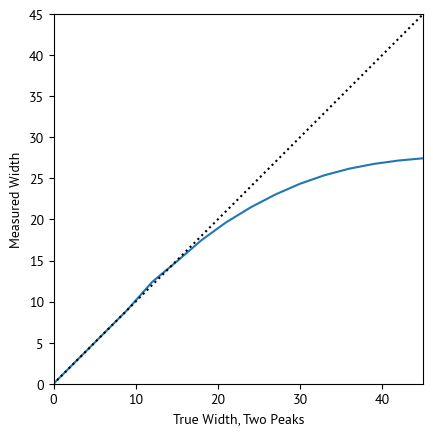

In [ ]:
from dmft import basesubwrapnorm
from scipy.interpolate import interp1d

true_s = np.linspace(0,45,16)
meas_s = np.zeros_like(true_s)

def calc_HWHM(data,n):
    itp = UnivariateSpline(np.arange(-n//2,n)/n*180,np.concatenate((data[-n//2:],data)),s=0)
    half = (itp(0) - 0)/2 + 0
    roots = UnivariateSpline(np.linspace(-60,105,271),itp(np.linspace(-60,105,271))-half,s=0).roots()
    width = 0.5*np.abs(roots[1]-roots[0])
    if len(roots)==2: width -= 22.5
    return width

for idx,s in enumerate(true_s):
    if np.isclose(s,0):
        meas_s[idx] = 0
    else:
        data = basesubwrapnorm(np.arange(180)*180/180,s) + basesubwrapnorm(np.arange(180)*180/180 - 45,s)
        meas_s[idx] = calc_HWHM(data,180) / np.sqrt(2*np.log(2))
    
plt.plot(true_s,meas_s)
plt.plot((-1,46),(-1,46),"k:")
plt.gca().set_aspect("equal")
plt.xlim(0,45)
plt.ylim(0,45)

plt.xlabel("True Width, Two Peaks")
plt.ylabel("Measured Width")

corr_itp = interp1d(meas_s,true_s)

In [ ]:
from scipy.interpolate import UnivariateSpline,CubicSpline,make_smoothing_spline
from scipy.optimize import root

sim_norm_srMEs = np.zeros((5,2))
sim_norm_srMIs = np.zeros((5,2))
sim_norm_srCEs = np.zeros((5,2))
sim_norm_srCIs = np.zeros((5,2))
dmft_norm_srMEs = np.zeros((5,2))
dmft_norm_srMIs = np.zeros((5,2))
dmft_norm_srCEs = np.zeros((5,2))
dmft_norm_srCIs = np.zeros((5,2))

def periodic_spline(data,n):
    return make_smoothing_spline(np.arange(-n//2,n)/n*180,np.concatenate((data[-n//2:],data)),lam=1.5*n)

def calc_base(data,n):
    itp = periodic_spline(data,n)
    return itp(90)

def calc_HWHM(data,n,base=None):
    itp = periodic_spline(data,n)
    if base is None:
        half = (itp(0) - itp(135))/2 + itp(135)
    else:
        half = (itp(0) - base)/2 + base
    roots = UnivariateSpline(np.linspace(-45,90,136),itp(np.linspace(-45,90,136))-half,s=0).roots()
    return 0.5*(np.abs(roots[1]-roots[0]) - 45)

for c_idx in range(1,6):
    sim_norm_srMEs[c_idx-1,0] = calc_HWHM(sim_norm_μrEs[c_idx,0,:],nori,
                                            calc_base(sim_μrEs[c_idx,0,:],nori)) / np.sqrt(2*np.log(2))
    sim_norm_srMEs[c_idx-1,1] = calc_HWHM(sim_norm_μrEs[c_idx,1,:],nori,
                                            calc_base(sim_μrEs[c_idx,1,:],nori)) / np.sqrt(2*np.log(2))
    sim_norm_srMIs[c_idx-1,0] = calc_HWHM(sim_norm_μrIs[c_idx,0,:],nori,
                                            calc_base(sim_μrIs[c_idx,0,:],nori)) / np.sqrt(2*np.log(2))
    sim_norm_srMIs[c_idx-1,1] = calc_HWHM(sim_norm_μrIs[c_idx,1,:],nori,
                                            calc_base(sim_μrIs[c_idx,1,:],nori)) / np.sqrt(2*np.log(2))
    sim_norm_srCEs[c_idx-1,0] = calc_HWHM(sim_norm_ΣrEs[c_idx,0,:]+sim_norm_μrEs[c_idx,0,:]**2,nori,
                                            calc_base(sim_ΣrEs[c_idx,0,:]+sim_μrEs[c_idx,0,:]**2,nori)) /\
                                            np.sqrt(2*np.log(2))
    sim_norm_srCEs[c_idx-1,1] = calc_HWHM(sim_norm_ΣrEs[c_idx,1,:]+sim_norm_μrEs[c_idx,1,:]**2,nori,
                                            calc_base(sim_ΣrEs[c_idx,1,:]+sim_μrEs[c_idx,1,:]**2,nori)) /\
                                            np.sqrt(2*np.log(2))
    sim_norm_srCIs[c_idx-1,0] = calc_HWHM(sim_norm_ΣrIs[c_idx,0,:]+sim_norm_μrIs[c_idx,0,:]**2,nori,
                                            calc_base(sim_ΣrIs[c_idx,0,:]+sim_μrIs[c_idx,0,:]**2,nori)) /\
                                            np.sqrt(2*np.log(2))
    sim_norm_srCIs[c_idx-1,1] = calc_HWHM(sim_norm_ΣrIs[c_idx,1,:]+sim_norm_μrIs[c_idx,1,:]**2,nori,
                                            calc_base(sim_ΣrIs[c_idx,1,:]+sim_μrIs[c_idx,1,:]**2,nori)) /\
                                            np.sqrt(2*np.log(2))
    
    sim_norm_srMEs[c_idx-1,0] = np.fmin(35.9,corr_itp(sim_norm_srMEs[c_idx-1,0]))
    sim_norm_srMEs[c_idx-1,1] = np.fmin(35.9,corr_itp(sim_norm_srMEs[c_idx-1,1]))
    sim_norm_srMIs[c_idx-1,0] = np.fmin(35.9,corr_itp(sim_norm_srMIs[c_idx-1,0]))
    sim_norm_srMIs[c_idx-1,1] = np.fmin(35.9,corr_itp(sim_norm_srMIs[c_idx-1,1]))
    sim_norm_srCEs[c_idx-1,0] = np.fmin(35.9,corr_itp(sim_norm_srCEs[c_idx-1,0]))
    sim_norm_srCEs[c_idx-1,1] = np.fmin(35.9,corr_itp(sim_norm_srCEs[c_idx-1,1]))
    sim_norm_srCIs[c_idx-1,0] = np.fmin(35.9,corr_itp(sim_norm_srCIs[c_idx-1,0]))
    sim_norm_srCIs[c_idx-1,1] = np.fmin(35.9,corr_itp(sim_norm_srCIs[c_idx-1,1]))
    
    with open("./../../model_data/dmft_opto_norm_c_{:d}".format(c_idx)+".pkl","rb") as\
            handle:
        res_dict = pickle.load(handle)
    dmft_norm_srMEs[c_idx-1] = np.fmin(35.9,res_dict["dmft_res"]["sr"][0::2])
    dmft_norm_srMIs[c_idx-1] = np.fmin(35.9,res_dict["dmft_res"]["sr"][1::2])
    dmft_norm_srCEs[c_idx-1] = np.fmin(35.9,res_dict["dmft_res"]["sCr"][0::2,0])
    dmft_norm_srCIs[c_idx-1] = np.fmin(35.9,res_dict["dmft_res"]["sCr"][1::2,0])

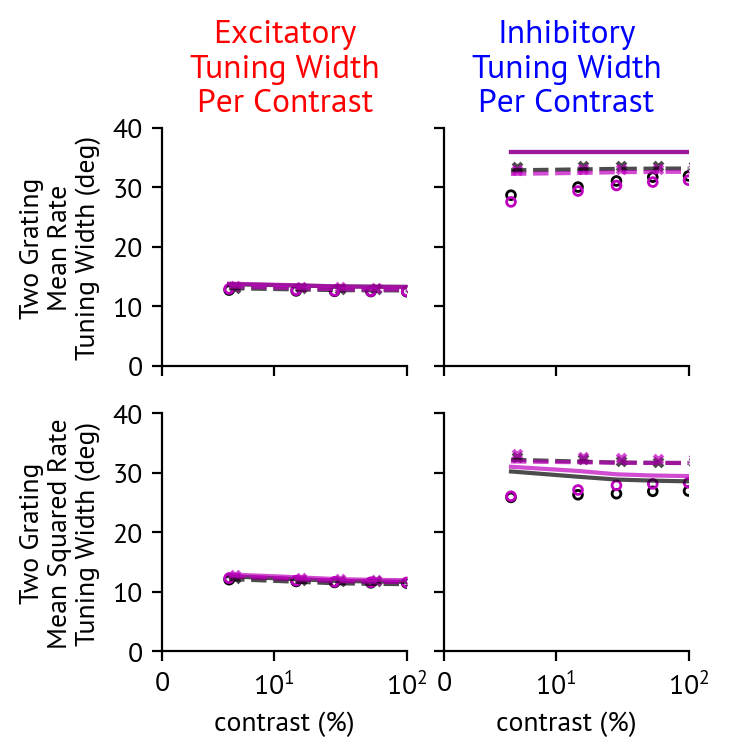

In [ ]:
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]
shift_cons = cons.copy()
shift_cons[shift_cons <  12] += 0.5
shift_cons[shift_cons >= 12] *= 1.1
    
fig,axs = plt.subplots(2,2,figsize=(1.7*2,1.7*2),dpi=200,sharex=True,sharey="row")
fig.subplots_adjust(wspace=0.15)

for i in range(2):
    axs[0,0].scatter(shift_cons[1:],
        sim_srMEs[:,i],facecolors=["k","m"][i],marker="x",s=10,alpha=0.7)
    axs[0,1].scatter(shift_cons[1:],
        sim_srMIs[:,i],facecolors=["k","m"][i],marker="x",s=10,alpha=0.7)
    axs[1,0].scatter(shift_cons[1:],
        sim_srCEs[:,i],facecolors=["k","m"][i],marker="x",s=10,alpha=0.7)
    axs[1,1].scatter(shift_cons[1:],
        sim_srCIs[:,i],facecolors=["k","m"][i],marker="x",s=10,alpha=0.7)
    axs[0,0].scatter(cons[1:],
        sim_norm_srMEs[:,i],edgecolors=["k","m"][i],facecolors="none",marker="o",s=10)
    axs[0,1].scatter(cons[1:],
        sim_norm_srMIs[:,i],edgecolors=["k","m"][i],facecolors="none",marker="o",s=10)
    axs[1,0].scatter(cons[1:],
        sim_norm_srCEs[:,i],edgecolors=["k","m"][i],facecolors="none",marker="o",s=10)
    axs[1,1].scatter(cons[1:],
        sim_norm_srCIs[:,i],edgecolors=["k","m"][i],facecolors="none",marker="o",s=10)
    axs[0,0].plot(cons[1:],dmft_srMEs[:,i],c=["k","m"][i],ls="--",alpha=0.7)
    axs[0,1].plot(cons[1:],dmft_srMIs[:,i],c=["k","m"][i],ls="--",alpha=0.7)
    axs[1,0].plot(cons[1:],dmft_srCEs[:,i],c=["k","m"][i],ls="--",alpha=0.7)
    axs[1,1].plot(cons[1:],dmft_srCIs[:,i],c=["k","m"][i],ls="--",alpha=0.7)
    axs[0,0].plot(cons[1:],dmft_norm_srMEs[:,i],c=["k","m"][i],ls="-",alpha=0.7)
    axs[0,1].plot(cons[1:],dmft_norm_srMIs[:,i],c=["k","m"][i],ls="-",alpha=0.7)
    axs[1,0].plot(cons[1:],dmft_norm_srCEs[:,i],c=["k","m"][i],ls="-",alpha=0.7)
    axs[1,1].plot(cons[1:],dmft_norm_srCIs[:,i],c=["k","m"][i],ls="-",alpha=0.7)

axs[0,0].set_xscale("symlog", linthresh=12)
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,40)
axs[1,0].set_ylim(0,40)
for i in range(2):
    axs[1,i].set_xlabel("contrast (%)")
    
for ax in axs.flat:
    ax.spines[["right", "top"]].set_visible(False)

axs[0,0].set_ylabel("Two Grating\nMean Rate\nTuning Width (deg)")
axs[1,0].set_ylabel("Two Grating\nMean Squared Rate\nTuning Width (deg)")

axs[0,0].set_title("Excitatory\nTuning Width\nPer Contrast",color="r")
axs[0,1].set_title("Inhibitory\nTuning Width\nPer Contrast",color="b")

fig.savefig("./fig_5c.pdf")

# Plot Normalization Weights from Fig 5d

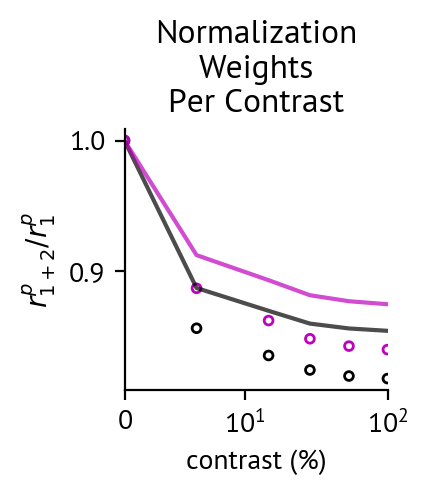

In [ ]:
with open("./../../experimental_data/data_moments"+".pkl", "rb") as handle:
    data_preds = np.transpose(pickle.load(handle)[1],(1,0,2))
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]

oris = np.arange(nori//2+1) * 90/(nori/2)
def abs_ori(A):
    return 0.5*(A[:nori//2+1] + np.concatenate((A[0:1],A[-1:nori//2-1:-1])))

cidx = 5

fig,ax = plt.subplots(1,1,figsize=(1.7*1,1.7*1),dpi=200,sharex=True,sharey=False)
fig.subplots_adjust(hspace=0.15,wspace=0.3)

for i,opto in enumerate(np.arange(2)):
    base = 0.8*np.mean(dmft_μrEs[0,i,:])+0.2*np.mean(dmft_μrIs[0,i,:])
    peak1 = 0.8*dmft_μrEs[:,i,0]+0.2*dmft_μrIs[:,i,0]
    peak2 = 0.8*dmft_norm_μrEs[:,i,0]+0.2*dmft_norm_μrIs[:,i,0]
    ax.plot(cons,peak2/peak1,c=["k","m"][i],ls="-",alpha=0.7)
    base = 0.8*np.mean(sim_μrEs[0,i,:])+0.2*np.mean(sim_μrIs[0,i,:])
    peak1 = 0.8*sim_μrEs[:,i,0]+0.2*sim_μrIs[:,i,0]
    peak2 = 0.8*sim_norm_μrEs[:,i,0]+0.2*sim_norm_μrIs[:,i,0]
    ax.scatter(cons,peak2/peak1,edgecolors=["k","m"][i],
                facecolors="none",marker="o",s=10,
                label=["Vis Only","Vis+Opto"][i])

ax.spines[["right", "top"]].set_visible(False)
    
ax.set_xscale("symlog", linthresh=12)
ax.set_xlim(0,100)

ax.set_xlabel("contrast (%)")

ax.set_ylabel(r"$r^p_{1+2}/r^p_{1}$")

ax.set_title("Normalization\nWeights\nPer Contrast",color="k")

# fig.tight_layout()
fig.savefig("./fig_5d.pdf")